In [77]:
"""
    Importo le librerie per poter analizzare 
    i dati e gli affibio degli alias per velocizzarne l'utilizzo
"""
import numpy as np
import pandas as pd

"""
    -------------- PRIMA RICHIESTA
    Scaricato il dataset e rinominato per semplicità
    lo andiamo a caricare ed analizzare
"""
# Carica il dataset dal file CSV
df = pd.read_csv('covid_db.csv')

# Visualizza le prime righe del dataset per avere un'idea del suo contenuto
print(df.head())
"""
    vediamo cosi che il dataset importato ha per ogni riga 67 campi
"""

# Verifica la dimensione del dataset (numero di righe e colonne)
print(f"Numero di righe e colonne nel dataset: {df.shape}")
"""
    vediamo cosi che il dataset importato ha 429435 righe
"""
# Visualizza i nomi delle colonne
print(f"Nomi delle colonne nel dataset: {df.columns}")
"""
    scopriamo il nome di ogni campo e iniziamo a selezionare quelli
    che torneranno utili piu avanti:
    'continent', 'location', 'date', 'total_cases', 'new_cases',
    'icu_patients_per_million', 'hosp_patients',
    'hosp_patients_per_million', 'weekly_icu_admissions',
    'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million'
"""
# Visualizza i tipi di dati per ciascuna colonna
print(f"Tipi di dati delle colonne: {df.dtypes}")

"""
    per trovare i valori nulli di ogni colonna
    ho utilizzato questa logica:
    Dopo aver ottenuto il DataFrame con True e False da df.isnull(), 
    il metodo sum() applicato su di esso somma i valori per ciascuna colonna, 
    considerando True come 1 e False come 0. 
    Questo ti restituirà il numero di valori nulli (mancanti) in ogni colonna
"""
# Verifica la presenza di valori nulli nel dataset
print(f"Valori nulli per colonna: {df.isnull().sum()}")

"""
    N.B. i valori espressi dal print di seguito
    sono espressi in notazione scientifica.
    La notazione scientifica (ad esempio 1.520336e+08) 
    è un modo compatto di rappresentare numeri molto grandi o molto piccoli.
    La notazione e+08 del numero preso in esempio
    significa "moltiplicato per 10 elevato alla potenza 8"
"""
# Statistiche descrittive per le colonne numeriche
print(df.describe())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [43]:
"""
    -------------- SECONDA RICHIESTA
    Per ogni continente trovare il numero totale di casi
    e successivamente esprimere in percentuale i casi rispetto al totale
    
    Per farlo andro a creare due variabili che rappresentano i casi per continente
    e tutti i casi a livello mondiale in modo tale da poterli manipolare per esprimerli in percentuale
"""


"""
    avendo visto che nel campo continent sono mancanti 26525 vado a visionarli su excel
    percapire come pulire i dati prima di analizzarli.
    Uno dei possibili problemi possono essere le righe che vanno a duplicare
    i dati come ad esempio quelle riguardo il conteggio mondiale
    mi riferisco a quelle che nel campo location (dove sono presenti le nazioni) hanno i valori come world, europe ecc.
"""

# Elimina i duplicati per sicurezza
df = df.drop_duplicates()
# Pulisco la base dati creando un df pulito avendo visto che le 26525 righe in cui
# non è stato assegnato il valore continent sono valori che prendono in considerazione
# il conteggio dei casi di macro aree (in sostanza sono dati rindondanti):
df_pulito = df.dropna(subset=['continent'])

# raggruppo per continente e sommo i nuovi casi in modo da ottenere i casi di covid per ogni continente

continent_cases = df_pulito.groupby('continent')['new_cases'].sum()
print(f"il numero dei casi per {continent_cases}")

# Calcolo il totale mondiale dei casi e li salvo in una variabile
world_total_cases = continent_cases.sum()

print(f"il numero totale dei casi è {world_total_cases}")

# Calcolo la percentuale di casi per ogni continente rispetto al totale mondiale
continent_percentage = (continent_cases / world_total_cases) * 100

# Unisco i risultati in un unica tabella
continent_stats = pd.DataFrame({
    'Total Cases': continent_cases,
    'Percentage of World Total': continent_percentage
})

# Trasformo i valori della colonna da float a interi
continent_stats['Total Cases'] = continent_stats['Total Cases'].astype(int)

# Visualizza i risultati
print(continent_stats)

il numero dei casi per continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64
il numero totale dei casi è 775935057.0
               Total Cases  Percentage of World Total
continent                                            
Africa            13146831                   1.694321
Asia             301564180                  38.864616
Europe           252916868                  32.595108
North America    124492698                  16.044216
Oceania           15003468                   1.933598
South America     68811012                   8.868141


       Giorno      Casi
0  2022-01-01   5622431
1  2022-01-02   6267035
2  2022-01-09   7281297
3  2022-01-16   8549450
4  2022-01-23   9781191
5  2022-01-30  10821375
6  2022-02-06  11542793
7  2022-02-13  12053330
8  2022-02-20  12427773
9  2022-02-27  12732680
10 2022-03-06  12990223
11 2022-03-13  13323128
12 2022-03-20  13800179
13 2022-03-27  14304111
14 2022-04-03  14790806
15 2022-04-10  15238128
16 2022-04-17  15659835
17 2022-04-24  16079209
18 2022-05-01  16463200
19 2022-05-08  16767773
20 2022-05-15  17030147
21 2022-05-22  17229263
22 2022-05-29  17373741
23 2022-06-05  17490451
24 2022-06-12  17634065
25 2022-06-19  17844905
26 2022-06-26  18184917
27 2022-07-03  18695954
28 2022-07-10  19357938
29 2022-07-17  20076863
30 2022-07-24  20608190
31 2022-07-31  21002773
32 2022-08-07  21286771
33 2022-08-14  21480076
34 2022-08-21  21630998
35 2022-08-28  21788862
36 2022-09-04  21925073
37 2022-09-11  22035717
38 2022-09-18  22148935
39 2022-09-25  22284812
40 2022-10-02  2

<Axes: title={'center': 'Andamento dei casi 2022 ITALIA'}, xlabel='Giorno'>

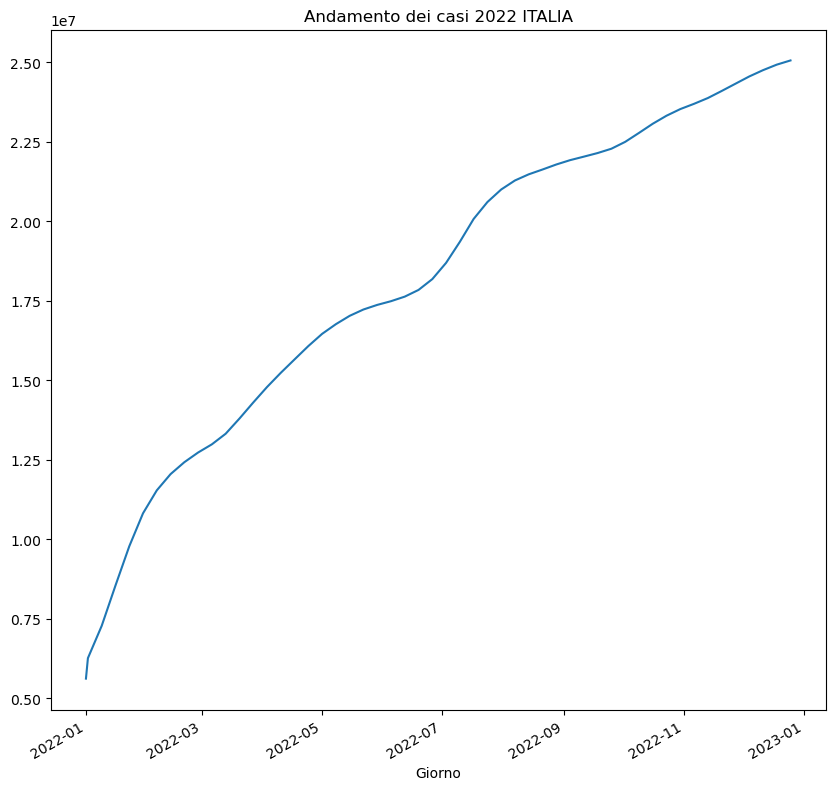

In [71]:
"""
    -------------- TERZA RICHIESTA
    Mostrare andamento dei casi in Italia nel corso dell' anno 2022
    e fare una rappresentazione grafica

    Per farlo prendero solo le righe inerenti l' Italia
    dopodiche prendero le righe che contengono 2022 nella data
    in fine creero un grafico che mostri l' andamento graficamente
"""
# Dato che nella funzione description il campo date è indicato come oggetto
# mi assicuro che la colonna 'date' sia nel formato datetime questo ci tornerà utile anche successivamente
df['date'] = pd.to_datetime(df['date'])
# Filtro i dati per data e poi per location = Italy\iso code = ITA ora è inoltre possibile filtrare i dati anche per anno
df_ita_2022 = df[(df['iso_code'] == 'ITA') & (df['date'].dt.year == 2022)]
# Creo una tabella che abbia come colonne la data e i casi totali
# Unisco i risultati in un unica tabella
covid_ita_22 = pd.DataFrame({
    'Giorno': df_ita_2022['date'],
    'Casi': df_ita_2022['total_cases']
})
# raffino le informazioni in modo da avere il dati inerenti il primo giorno di ogni settimana
covid_ita_22 = covid_ita_22.drop_duplicates(subset='Casi', keep='first')
covid_ita_22 = covid_ita_22.reset_index(drop=True)
covid_ita_22['Casi'] = covid_ita_22['Casi'].astype(int)

print(covid_ita_22)

# Imposto 'Giorno' come indice
covid_ita_22.set_index('Giorno', inplace=True)

# Creo il grafico a linee usando pandas deinendo i parametri per renderlo visualizzabile
covid_ita_22['Casi'].plot(kind="line", figsize=(10, 10), title='Andamento dei casi 2022 ITALIA')






       iso_code continent location        date  total_cases  new_cases  \
131214      FRA    Europe   France  2022-05-01   27742592.0   376510.0   
131215      FRA    Europe   France  2022-05-02   27742592.0        0.0   
131216      FRA    Europe   France  2022-05-03   27742592.0        0.0   
131217      FRA    Europe   France  2022-05-04   27742592.0        0.0   
131218      FRA    Europe   France  2022-05-05   27742592.0        0.0   
...         ...       ...      ...         ...          ...        ...   
186482      ITA    Europe    Italy  2023-04-26   25772459.0        0.0   
186483      ITA    Europe    Italy  2023-04-27   25772459.0        0.0   
186484      ITA    Europe    Italy  2023-04-28   25772459.0        0.0   
186485      ITA    Europe    Italy  2023-04-29   25772459.0        0.0   
186486      ITA    Europe    Italy  2023-04-30   25795509.0    23050.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
131214           53787.143      14

<Axes: xlabel='location', ylabel='icu_patients'>

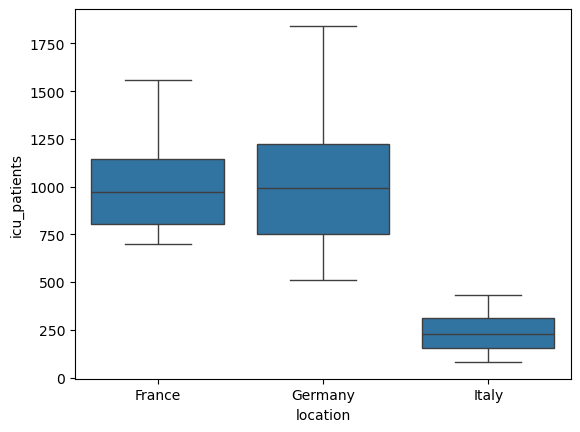

In [103]:
"""
    -------------- QUARTA RICHIESTA
    Confrontare il numero dei pazienti in terapia intensiva
    dei paesi  Italia, Germania e Francia da 2022-05-01 al 2023-04-30    
"""
# importo seaporn per creare il tipo di grafico richiesto
import seaborn as sns
# Sapendo che le date sono in formato datetime
# filtro il df per le date tra maggio 2022 e aprile 2023
start_date = '2022-05-01'
end_date = '2023-04-30'

df_filtered_dates = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Filtro il DataFrame per includere solo le righe per Germany, Italy, e France
df_icu_location = df_filtered_dates[df_filtered_dates['location'].isin(['Germany', 'Italy', 'France'])]

# Creo il boxplot usando Seaborn
sns.boxplot(x='location', y='icu_patients', data=df_icu_location)

"""
    COMMENTO AL PUNTO 4:
    Questo grafico mostra un box plot che mette a confronto i pazienti 
    in terapia intensiva in tre paesi europei: Francia, Germania e Italia.
    
    Si specifica che i dati provengono dal DataFrame df_icu_location,
    che contiene solo i dati relativi alle date tra maggio 2022 e aprile 2023

    L'asse y mostra il numero di pazienti in terapia intensiva, compreso tra 0 e circa 1800.

    La Francia mostra una media di circa 1.000 pazienti in terapia intensiva, con un range che va da circa 700 a 1.500
    La Germania ha una mediana simile a quella della Francia (circa 1.000) ma con una diffusione più ampia, che va da circa 500 a 1.800 pazienti
    L’Italia mostra numeri significativamente più bassi, con una mediana di circa 250 pazienti in terapia intensiva e un range molto più piccolo che va da circa 100 a 400 pazienti

    La casella in ogni grafico rappresenta l'intervallo interquartile (IQR), con la linea interna che mostra la mediana. 
    I baffi si estendono per mostrare l'intera gamma dei dati, escludendo eventuali valori anomali.

    Questa visualizzazione mostra efficacemente sia la tendenza centrale che la variabilità nel numero di pazienti in terapia intensiva in questi tre paesi,
    evidenziando che mentre Francia e Germania avevano tendenze centrali simili, l’Italia aveva numeri notevolmente inferiori durante il periodo misurato.

    Ma non è tutto oro quello che luccica!
    Qusti numeri hanno una serie di spiegazioni:

    La capacità di terapia intensiva e i letti ospedalieri pro capite variano in modo significativo tra Francia, Germania e Italia. 
    Secondo gli ultimi dati, la Germania ha la più alta capacità di posti letto in terapia intensiva con circa 38,7 posti letto ogni 100.000 persone,
    seguita da Turchia e Stati Uniti. 
    L’Italia ha circa 12,5 posti letto in terapia intensiva ogni 100.000, mentre la Francia ha circa 11,6 posti letto ogni 100.000.
    
    Storicamente, il sistema sanitario tedesco è stato meglio preparato alla pandemia di COVID-19 grazie a un numero maggiore di ospedali
    e posti letto in terapia intensiva, che ha contribuito a un tasso di mortalità inferiore rispetto a Francia e Italia. 
    In Italia, l’occupazione di base dei letti in terapia intensiva da parte dei pazienti non COVID è inferiore (48%) rispetto a Francia (87%) e Germania (79%),
    consentendo strategie più reattive durante la pandemia.

    I dati mostrano differenze significative nella capacità di terapia intensiva tra questi paesi, 
    con la Germania che ha più del triplo dei letti di terapia intensiva pro capite rispetto a Italia e Francia.
    Ciò spiega i numeri più alti che vediamo nel box plot per Germania e Francia, mentre l’Italia mostra numeri più bassi 
    a causa della sua capacità di terapia intensiva più limitata.    
    
"""





In [117]:
"""
    -------------- QUINTA RICHIESTA
    Confrontare il numero totale dei pazienti ospidalizzati (hosp_patients)
    dei paesi  Italia, Germania, Francia e Spagna nel 2023    
"""

df['date'] = pd.to_datetime(df['date'])
df_hospidalized_2023 = df[(df['location'].isin(['Germany', 'Italy', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]
df_hospidalized_2023 = df_hospidalized_2023.groupby('location')['hosp_patients'].sum()

print(df_hospidalized_2023)



location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [126]:
"""
    COMMENTO AL PUNTO 5:
    In assenza di dati si possono ricavare valori utili dalla colonna weekly_hosp_admissions 
    per quel che ne concerne i dati della Germenia.     
"""

df_hospidalized_2023_germany = df[(df['location'] == 'Germany') & (df['date'].dt.year == 2023)]

# Calculate total weekly admissions for 2023
total_admissions_2023 = df_hospidalized_2023_germany['weekly_hosp_admissions'].sum()

print(f"il numero totale degli ospidalizzati in Germania nel 2023 è di: {total_admissions_2023}")

il numero totale degli ospidalizzati in Germania nel 2023 è di: 897776.0
